In [4]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import math

In [5]:
data = pd.read_csv('ex2data1.txt', header=None)
data.columns = ['x1', 'x2', 'y']

Text(0,0.5,'x2')

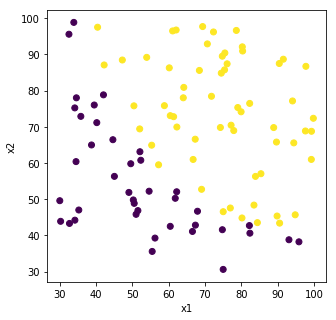

In [6]:
plt.figure(figsize=(5, 5))
plt.scatter(data.x1, data.x2, c=data.y)
plt.xlabel('x1')
plt.ylabel('x2')

In [93]:
# x and y
x, y = data[['x1', 'x2']].values, data['y'].values
y = y.reshape(-1, 1)

# dims
m, n = data.shape[0], data.shape[1]

# add the bias
x = np.insert(x, 0, 1, axis=1)

# initial theta
theta = np.zeros(n)[:, np.newaxis]

In [91]:
# sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))

# cost function
def cost(x, y, theta):
    # size
    m = x.shape[0]
    
    # hipotesis
    hypotesis = sigmoid(x.dot(theta))
    
    # cost
    J = (1/m) * np.sum((-y*np.log(hypotesis)-(1-y)*np.log(1-hypotesis)), 0)
    
    return J

# gradient descent
def grad(x, y, alpha, theta, iterations):
    
    # local theta
    local_theta = theta.copy()
    
    # error list
    error_list = []
    
    # size
    m = x.shape[0]

    for i in range(iterations):
        
        # predictions
        preds = sigmoid(x.dot(local_theta))

        # error
        error = preds - y

        # loss
        if i == 0:
            loss = np.sum(error**2)
            error_list.append(loss)

        #gradient
        grad = np.sum(error*x, axis=0)/m

        # theta
        local_theta += -alpha*grad.reshape(-1, 1)
    
    return local_theta, error_list

# predict
def predict(theta, x):
    return sigmoid(x.dot(theta))

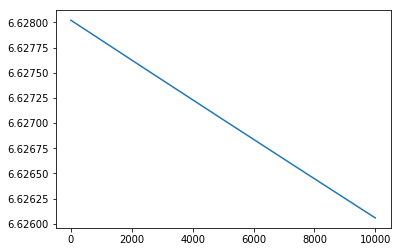

In [11]:
theta1, errors = grad(x, y, 0.001, theta, 10000)
plt.plot(errors)

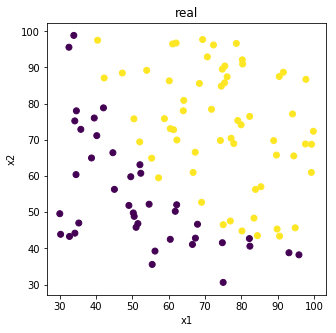

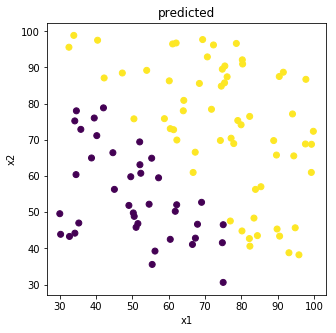

In [13]:


plt.figure(figsize=(5, 5))
plt.title("real")
plt.scatter(data.x1, data.x2, c=data.y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


plt.figure(figsize=(5, 5))
plt.title("predicted")
plt.scatter(data.x1, data.x2, c=y_pred.reshape(-1, 1).ravel())
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [114]:
# Stochastic Gradient Descent
def SGD(x, y, theta0, alpha, num_iters):
    # local theta
    l_theta = theta0.copy()
    
    # cost
    v = []

    for iter in range(num_iters):
        for n in range(x.shape[0]):
            # sample
            x_sample = x[n, :]
            y_sample = y[n, :]

            # gradient descent
            # predictions
            preds = sigmoid(x.dot(l_theta))

            # error
            error = preds - y

            #gradient
            grad = np.sum(error*x, axis=0)/m

            # theta
            l_theta += -alpha*grad.reshape(-1, 1)

            # cost
            v.append(cost(x, y, l_theta))
        
    return l_theta, v

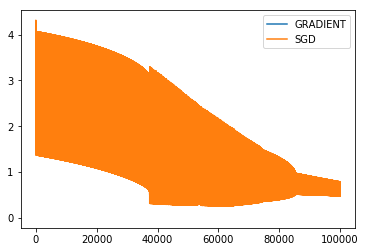

In [115]:
# initial theta
theta = np.zeros(n)[:, np.newaxis]

theta2, v = SGD(x, y, theta, 0.003, 1000)

plt.plot(errors, label='GRADIENT')
plt.plot(v, label='SGD')
plt.legend()

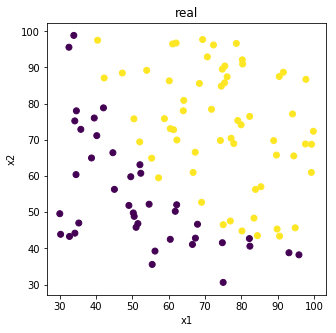

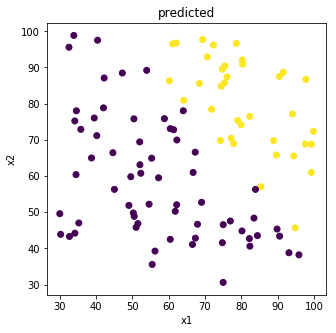

In [116]:
y_pred = predict(theta2, x) > 0.5

plt.figure(figsize=(5, 5))
plt.title("real")
plt.scatter(data.x1, data.x2, c=data.y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


plt.figure(figsize=(5, 5))
plt.title("predicted")
plt.scatter(data.x1, data.x2, c=y_pred.reshape(-1, 1).ravel())
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()